<a href="https://colab.research.google.com/github/JoaoMemoria/Qualificacao_Leads/blob/main/Classificacao_Leads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn seaborn matplotlib

# Load de Leads

In [ ]:
import pandas as pd

# Carregar os dados do arquivo CSV
df = pd.read_csv('/content/leads_simulados.csv')

# Verificar os dados
print(df.head())

# Verificar as colunas presentes no DataFrame
print("Colunas presentes no DataFrame:", df.columns)

     Nome Sobrenome                    Email        Telefone          Cidade  \
0    João     Silva      joaosilva@email.com  (11) 9999-8888       São Paulo   
1   Maria     Gomes     mariagomes@email.com  (21) 8888-7777  Rio de Janeiro   
2   Pedro  Oliveira  pedrooliveira@email.com  (31) 7777-6666  Belo Horizonte   
3     Ana     Costa       anacosta@email.com  (41) 6666-5555        Curitiba   
4  Carlos   Almeida  carlosalmeida@email.com  (51) 5555-4444    Porto Alegre   

  Estado             Empresa                  Cargo Venda_Feita  
0     SP           ACME Inc.          Desenvolvedor         Sim  
1     RJ     LTDA Consulting  Analista de Marketing         Não  
2     MG      XPTO Solutions      Gerente de Vendas         Sim  
3     PR  WEBMEDIA Marketing        Analista de SEO         Sim  
4     RS          SOLUCAO TI      Desenvolvedor Web         Não  
Colunas presentes no DataFrame: Index(['Nome', 'Sobrenome', 'Email', 'Telefone', 'Cidade', 'Estado', 'Empresa',
       'Car

# Pré-proces. de Dados

In [ ]:
# Converter a coluna de Venda_Feita para binária
df['Venda_Feita'] = df['Venda_Feita'].apply(lambda x: 1 if x == 'Sim' else 0)

# Remover colunas irrelevantes (verifique se essas colunas existem antes de remover)
if 'Email' in df.columns:
    df = df.drop(columns=['Email'])
if 'Telefone' in df.columns:
    df = df.drop(columns=['Telefone'])
if 'Nome' in df.columns:
    df = df.drop(columns=['Nome'])
if 'Sobrenome' in df.columns:
    df = df.drop(columns=['Sobrenome'])

# Verificar novamente as colunas após remoção
print("Colunas após remoção:", df.columns)

# Garantir que todas as colunas categóricas necessárias estão presentes
categorical_columns = ['Cidade', 'Estado', 'Empresa', 'Cargo']
for col in categorical_columns:
    if col not in df.columns:
        raise KeyError(f"A coluna '{col}' não está presente no DataFrame")

# Converter colunas categóricas para numéricas usando get_dummies
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Dividir os dados em features (X) e target (y)
X = df.drop('Venda_Feita', axis=1)
y = df['Venda_Feita']

# Dividir os dados em conjunto de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Colunas após remoção: Index(['Cidade', 'Estado', 'Empresa', 'Cargo', 'Venda_Feita'], dtype='object')


# Treinando o Modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Treinar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.83      1.00      0.91        15

    accuracy                           0.85        20
   macro avg       0.92      0.70      0.74        20
weighted avg       0.88      0.85      0.82        20

[[ 2  3]
 [ 0 15]]


# Avaliação do Modelo - Acurácia

In [ ]:
from sklearn.metrics import accuracy_score

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

Acurácia: 0.85


# Insights

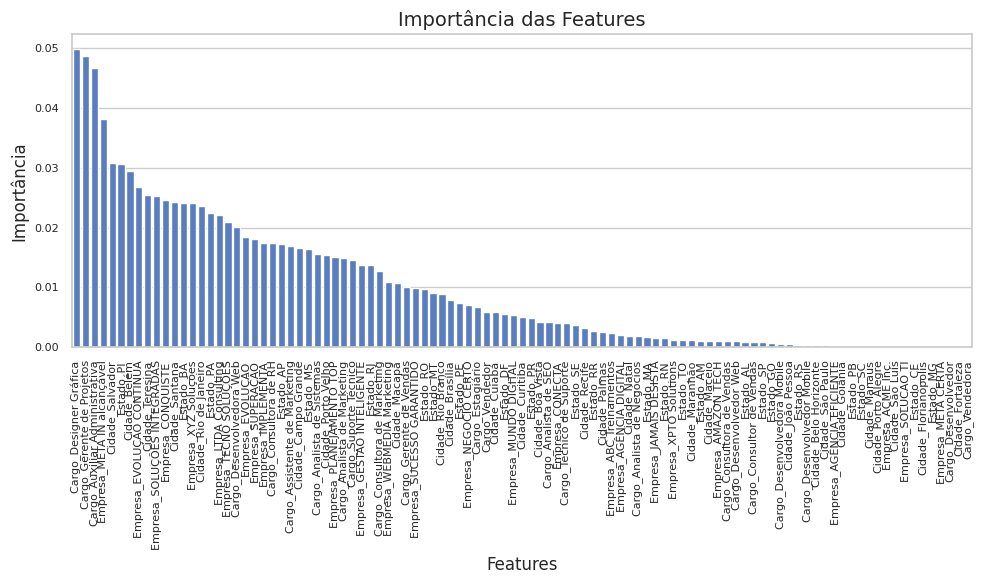

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo e a paleta de cores do Seaborn
sns.set(style="whitegrid")
sns.set_palette("muted")

# Obter a importância das features
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Criar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'])

# Ajustar os rótulos e o título do gráfico
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importância', fontsize=12)
plt.title('Importância das Features', fontsize=14)
plt.tight_layout()  # Ajustar layout para que os rótulos não fiquem cortados

# Exibir o gráfico
plt.show()